In [2]:
#dependencies and set-up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#data files and read results
mouse_path = r"C:\Users\stave\OneDrive\Desktop\Bootcamp\week 5\Challenge\Mouse_metadata.csv"
study_path = r"C:\Users\stave\OneDrive\Desktop\Bootcamp\week 5\Challenge\Study_results.csv"
mouse = pd.read_csv(mouse_path, encoding= 'utf-8')
study = pd.read_csv(study_path, encoding= 'utf-8')
mouse
study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
#merge data files
merge = pd.merge(mouse, study, how="left", on=["Mouse ID", "Mouse ID"])
merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
#count number of unique mice id
mice_id = merge["Mouse ID"].nunique()
mice_id

249

In [5]:
#find duplicate mice id
duplicate = merge[merge.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#create dataframe without duplicate mice information
duplicate2 = merge.drop_duplicates(['Mouse ID', 'Timepoint'], keep= False)
duplicate2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#calculate unique mouse count
mice_id2 = duplicate2["Mouse ID"].nunique()
mice_id2

249

In [8]:
#calculate mean of tumor volume based on drug regimen
mean = duplicate2.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#calculate median of tumor volume based on drug regimen
median = duplicate2.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#calculate variance of tumor volume based on drug regimen
variance = duplicate2.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     44.053659
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#calculate standard deviation of tumor volume based on drug regimen
standard_deviation = duplicate2.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.637293
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#calculate standard error of tumor volume based on drug regimen
standard_error = duplicate2.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
standard_error

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.540135
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#create dataframe for calculations of tumor volume based on drug regimen
summary = pd.DataFrame({
    'Mean Tumor Volume': mean, 
    'Median Tumor Volume': median, 
    'Tumor Volume Variance': variance, 
    'Tumor Volume Std. Dev': standard_deviation, 
    'Tumor Volume Std. Err': standard_error
})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
#calculate values using aggregate
aggregate = duplicate2.groupby(['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
aggregate

C:\Users\stave\AppData\Local\Temp\ipykernel_13600\1788089438.py:2: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggregate = duplicate2.groupby(['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


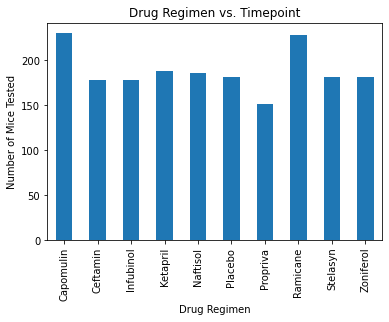

In [15]:
#Create bar chart with pandas for drug regimen vs timepoint
drug_groups = duplicate2.groupby('Drug Regimen')

timepoint = drug_groups['Timepoint'].count()

drug_vs_time = timepoint.plot(kind="bar", title="Drug Regimen vs. Timepoint")
drug_vs_time.set_xlabel("Drug Regimen")
drug_vs_time.set_ylabel("Number of Mice Tested")

plt.show()

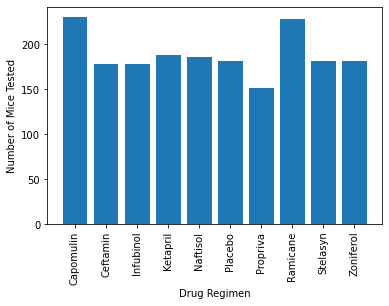

In [16]:
#Create bar chart with pyplot for drug regimen vs timepoint
plt.bar(timepoint.index, timepoint.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:ylabel='Mouse ID'>

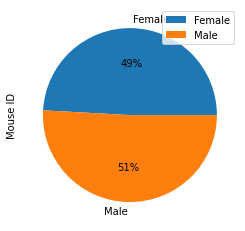

In [17]:
#Create pie chart with pandas for mouse gender
gender = duplicate2.groupby(['Sex']).count()
gender_pie = duplicate2.groupby(['Sex']).count().plot(kind='pie', y = 'Mouse ID', autopct='%1.0f%%')
gender_pie

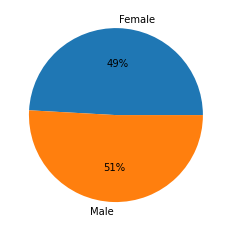

In [18]:
#Create pie chart with pyplot for mouse gender
gender = duplicate2.groupby(['Sex']).count()
plt.pie(gender["Mouse ID"], labels = gender.index, autopct='%1.0f%%')
plt.show()

In [97]:
#Last timepoint for each mouse
last_time = duplicate2.groupby(['Mouse ID', 'Tumor Volume (mm3)'])['Timepoint'].max()
last_time
#groupby('Mouse ID').max()['Timepoint']
#loc > groupby(mouse id) > max().....Grace example

Mouse ID  Tumor Volume (mm3)
a203      45.000000              0
          48.508468              5
          51.852437             10
          52.777870             15
          55.173336             20
                                ..
z969      63.145652             25
          65.841013             30
          69.176246             35
          70.314904             40
          73.867845             45
Name: Timepoint, Length: 1883, dtype: int64

In [98]:
volume_id = duplicate2.groupby(['Mouse ID', 'Tumor Volume (mm3)'])['Timepoint'].max().reset_index()
volume_id

,Mouse ID,Tumor Volume (mm3),Timepoint
0,a203,45.000000,0
1,a203,48.508468,5
2,a203,51.852437,10
3,a203,52.777870,15
4,a203,55.173336,20
...,...,...,...
1878,z969,63.145652,25
1879,z969,65.841013,30
1880,z969,69.176246,35
1881,z969,70.314904,40


In [101]:
df = duplicate2.loc[duplicate2.groupby(['Mouse ID','Tumor Volume (mm3)'])['Timepoint'].idxmax()] 
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
